In [1]:
import pandas as pd
import sklearn.preprocessing as prep
import sklearn.metrics as met
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dogs.csv')
features = df.columns[1:]

x_orig = df[features]
y = df['breed']

num_inst = df.shape[0]

In [4]:
scaler = prep.MinMaxScaler().fit(x_orig)
x = pd.DataFrame(scaler.transform(x_orig), columns = features)


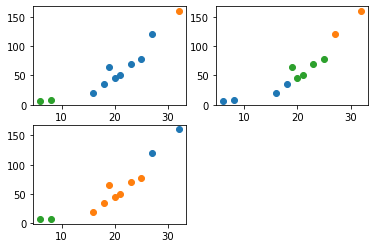

In [5]:
#hijerarhijsko klast n_clusters , affinity, linkage

fig = plt.figure()
plt_ind = 1

linkage = ['single', 'complete', 'average']
for link in linkage:
    
    est = AgglomerativeClustering(n_clusters=3, linkage =link)
    est.fit(x)
    
    df['label'] = est.labels_
    fig.add_subplot(2,2, plt_ind)
    
    for j in range(0,3):
        #izdvajanje instanci klastera
        cluster = df.loc[lambda x:x['label']==j,:]
        plt.scatter(cluster['height'], cluster['weight'], marker = 'o')
        
    plt_ind = plt_ind + 1